<a href="https://colab.research.google.com/github/nabilazh/TUGASDM-PakIrsyad-/blob/main/111_Nabila_Aulia_Azzahra_Tugas1DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=01e0c1a01a7dfafaa32d4dda5786fa492dfb6c9b7f672bffce56b829e3340d23
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [6]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/Tugas/data_retail2.xlsx')

In [7]:
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [8]:
# Buat dataset dengan label target 'Malang'
df2 = df[df["BRANCHNAME_SPLR"]=="MALANG"]

In [9]:
dfy = pd.DataFrame(df2)

In [10]:
dfy

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
38,536370,2020-12-01 08:45:00,22,MALANG,A2405,711844160095,22661,ABC JUICE SIRSAK,MINUMAN,20,...,12583.0,CHAMPION FULTSAL ARAYA,PERUM PBI BLOK A-7 BLIMBING,MALANG,JAWA TIMUR,INDONESIA,51,Sport Center,220109,PT. KOTAK AGRO SUBUR
223,536390,2020-12-01 10:19:00,22,MALANG,A0055,8991689668006,21533,AGAR SWALL LILY WHITE,MINUMAN,12,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
224,536390,2020-12-01 10:19:00,22,MALANG,A0060,8991689368036,21080,AGAR SWALL SUN CKL,MANISAN,96,...,17511.0,CV MAJU SELARAS,JL SIMPANG LA SUCIPTO ALAM NIRWANA RESIDENCE R...,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
227,536390,2020-12-01 10:19:00,22,MALANG,A0063,8991689368012,21786,AGAR SWALL SUN RED,MANISAN,144,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
317,536400,2020-12-01 10:53:00,22,MALANG,A0361,8999918441390,22969,AIM VEGETABLE 80G CRAC GARLIC,SNACK,12,...,13448.0,YON ZIPUR,JL. RAYA KRAPYAK NO 1 KEPANJEN,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [11]:
# Melihat data type
dfy.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [12]:
# Menampilkan info dataset (df.info())
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29021 entries, 38 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            29021 non-null  object        
 1   InvoiceDate          29021 non-null  datetime64[ns]
 2   BRANCH_SPLR          29021 non-null  int64         
 3   BRANCHNAME_SPLR      29021 non-null  object        
 4   warehouseProductsID  29021 non-null  object        
 5   BARCODEID            29021 non-null  int64         
 6   StockCode            29021 non-null  object        
 7   PRODUCT              29021 non-null  object        
 8   PRODUCT_CATEGORY     29021 non-null  object        
 9   Quantity             29021 non-null  int64         
 10  UnitPrice            29021 non-null  float64       
 11  UnitPriceRupiah      29021 non-null  float64       
 12  oldCUSTID            29021 non-null  object        
 13  CustomerID           19089 no

In [13]:
# Describe data
dfy.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,29021.0,2.902100e+04,29021.000000,29021.000000,2.902100e+04,19089.000000,29021.000000,29021.000000
mean,22.0,8.099582e+12,8.867234,3.847598,5.502065e+04,15359.584525,36.004273,220109.085731
std,0.0,2.508331e+12,673.259413,23.256578,3.325691e+05,1760.255292,7.233707,0.279971
min,22.0,1.000000e+00,-80995.000000,0.000000,0.000000e+00,12347.000000,14.000000,220109.000000
25%,22.0,8.888020e+12,1.000000,1.250000,1.787500e+04,13900.000000,32.000000,220109.000000
50%,22.0,8.992935e+12,3.000000,2.080000,2.974400e+04,15311.000000,32.000000,220109.000000
75%,22.0,8.998009e+12,10.000000,4.130000,5.905900e+04,17049.000000,42.000000,220109.000000
max,22.0,5.025232e+13,80995.000000,1861.460000,2.661888e+07,18283.000000,92.000000,220110.000000


In [14]:
# Menampilkan kolom BRANCHNAME_SPLR
pd.unique(dfy.BRANCHNAME_SPLR)

array(['MALANG'], dtype=object)

In [15]:
dfy.nunique()

InvoiceNo              2418
InvoiceDate            2261
BRANCH_SPLR               1
BRANCHNAME_SPLR           1
warehouseProductsID    3812
BARCODEID              3812
StockCode              3097
PRODUCT                3812
PRODUCT_CATEGORY         49
Quantity                189
UnitPrice               329
UnitPriceRupiah         329
oldCUSTID              1605
CustomerID             1259
CUSTNAME               1541
ADDRESS                1543
KOTA                      4
PROVINSI                  1
NEGARA                    1
CHANNELID_SPLR           23
CHANNELNAME_SPLR         23
SUBDISTID                 2
SUBDIST_NAME              2
dtype: int64

In [16]:
# Menampilkan data 5 baris pertama
dfy.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
38,536370,2020-12-01 08:45:00,22,MALANG,A2405,711844160095,22661,ABC JUICE SIRSAK,MINUMAN,20,...,12583.0,CHAMPION FULTSAL ARAYA,PERUM PBI BLOK A-7 BLIMBING,MALANG,JAWA TIMUR,INDONESIA,51,Sport Center,220109,PT. KOTAK AGRO SUBUR
223,536390,2020-12-01 10:19:00,22,MALANG,A0055,8991689668006,21533,AGAR SWALL LILY WHITE,MINUMAN,12,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
224,536390,2020-12-01 10:19:00,22,MALANG,A0060,8991689368036,21080,AGAR SWALL SUN CKL,MANISAN,96,...,17511.0,CV MAJU SELARAS,JL SIMPANG LA SUCIPTO ALAM NIRWANA RESIDENCE R...,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
227,536390,2020-12-01 10:19:00,22,MALANG,A0063,8991689368012,21786,AGAR SWALL SUN RED,MANISAN,144,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
317,536400,2020-12-01 10:53:00,22,MALANG,A0361,8999918441390,22969,AIM VEGETABLE 80G CRAC GARLIC,SNACK,12,...,13448.0,YON ZIPUR,JL. RAYA KRAPYAK NO 1 KEPANJEN,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR


In [17]:
# Menampilkan nilai rata-rata, min, max, dan standar deviasi untuk kolom Age
dfy.agg({"Quantity": ["mean", "min", "max", "std"]})

,Quantity
mean,8.867234
min,-80995.000000
max,80995.000000
std,673.259413


In [18]:
dfy.shape

(29021, 23)

##Data Pre-processing

  Data Cleansing

In [19]:
dfy.head(3)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
38,536370,2020-12-01 08:45:00,22,MALANG,A2405,711844160095,22661,ABC JUICE SIRSAK,MINUMAN,20,...,12583.0,CHAMPION FULTSAL ARAYA,PERUM PBI BLOK A-7 BLIMBING,MALANG,JAWA TIMUR,INDONESIA,51,Sport Center,220109,PT. KOTAK AGRO SUBUR
223,536390,2020-12-01 10:19:00,22,MALANG,A0055,8991689668006,21533,AGAR SWALL LILY WHITE,MINUMAN,12,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
224,536390,2020-12-01 10:19:00,22,MALANG,A0060,8991689368036,21080,AGAR SWALL SUN CKL,MANISAN,96,...,17511.0,CV MAJU SELARAS,JL SIMPANG LA SUCIPTO ALAM NIRWANA RESIDENCE R...,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [20]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfy['InvoiceDate'] = pd.to_datetime(dfy['InvoiceDate'])

In [21]:
# Clean up spaces in product description, product category and remove any rows that don't have a valid invoice
dfy['PRODUCT'] = dfy['PRODUCT'].str.strip()
dfy['PRODUCT_CATEGORY'] = dfy['PRODUCT_CATEGORY'].str.strip()

dfy.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [22]:
# menghapus variabel inoviceNO yang diawali dengan huruf C pada invoice numbernya
dfy['InvoiceNo'] = dfy['InvoiceNo'].astype('str')
dfy = dfy[~(dfy['InvoiceNo'].str[0] == 'C')]

####Data Transformation

In [23]:
dfy

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
38,536370,2020-12-01 08:45:00,22,MALANG,A2405,711844160095,22661,ABC JUICE SIRSAK,MINUMAN,20,...,12583.0,CHAMPION FULTSAL ARAYA,PERUM PBI BLOK A-7 BLIMBING,MALANG,JAWA TIMUR,INDONESIA,51,Sport Center,220109,PT. KOTAK AGRO SUBUR
223,536390,2020-12-01 10:19:00,22,MALANG,A0055,8991689668006,21533,AGAR SWALL LILY WHITE,MINUMAN,12,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
224,536390,2020-12-01 10:19:00,22,MALANG,A0060,8991689368036,21080,AGAR SWALL SUN CKL,MANISAN,96,...,17511.0,CV MAJU SELARAS,JL SIMPANG LA SUCIPTO ALAM NIRWANA RESIDENCE R...,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
227,536390,2020-12-01 10:19:00,22,MALANG,A0063,8991689368012,21786,AGAR SWALL SUN RED,MANISAN,144,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
317,536400,2020-12-01 10:53:00,22,MALANG,A0361,8999918441390,22969,AIM VEGETABLE 80G CRAC GARLIC,SNACK,12,...,13448.0,YON ZIPUR,JL. RAYA KRAPYAK NO 1 KEPANJEN,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [24]:
basket = (dfy[dfy['PROVINSI'] =="JAWA TIMUR"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
basket.head()

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536402,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Show a subset of columns
basket.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN
InvoiceNo,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536402,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536400,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
536401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536402,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###DATA MINING

Menampilkan kombinasi barang dengan metode apriori

In [27]:
basket_sets

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536400,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
536401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536402,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [28]:
dfa = basket_sets
dfa

PRODUCT_CATEGORY,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,ELEKTRONIK,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536400,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
536401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536402,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [29]:
# 1 Item set buat nampilkan berapa set tiap item
dfa.sum()

PRODUCT_CATEGORY
ALAT LISTRIK          79
ALAT RUMAH TANGGA    522
BEER                  33
BERAS                 79
BISKUIT              561
BUMBU                286
COKELAT              324
DETERGEN             432
DIET FOOD             72
ELEKTRONIK           137
ES                    68
GULAPUTIH             91
KACANG TANAH           7
KAPAS                 95
KECAP & SAUCE        157
KONSINYASI             7
KOSMETIK             728
LAIN-LAIN             77
MAKANAN              163
MAKANAN BAYI         112
MAKANAN KALENG       146
MAKANAN PAGI          91
MANISAN              176
MENTEGA               63
MIE                  154
MINUMAN              646
MINYAK GORENG        126
MINYAK RAMBUT         96
OBATAN               472
PAKAIAN               81
PAMPERS              266
PARFUM               571
PASTA & S-GIGI       184
PECAH BELAH          149
PEMBALUT WANITA      106
PERMEN               431
PRODUCT BAYI         199
ROKOK                174
SABUN & SAMPHOO      673
SEMIR SE

In [30]:
# Menampilkan item
dfa.columns

Index(['ALAT LISTRIK', 'ALAT RUMAH TANGGA', 'BEER', 'BERAS', 'BISKUIT',
       'BUMBU', 'COKELAT', 'DETERGEN', 'DIET FOOD', 'ELEKTRONIK', 'ES',
       'GULAPUTIH', 'KACANG TANAH', 'KAPAS', 'KECAP & SAUCE', 'KONSINYASI',
       'KOSMETIK', 'LAIN-LAIN', 'MAKANAN', 'MAKANAN BAYI', 'MAKANAN KALENG',
       'MAKANAN PAGI', 'MANISAN', 'MENTEGA', 'MIE', 'MINUMAN', 'MINYAK GORENG',
       'MINYAK RAMBUT', 'OBATAN', 'PAKAIAN', 'PAMPERS', 'PARFUM',
       'PASTA & S-GIGI', 'PECAH BELAH', 'PEMBALUT WANITA', 'PERMEN',
       'PRODUCT BAYI', 'ROKOK', 'SABUN & SAMPHOO', 'SEMIR SEPATU', 'SLAI/JAM',
       'SNACK', 'STATIONERY', 'SUSU', 'SYRUP', 'TANDAS', 'TEH & KOPI',
       'TEPUNG', 'TISSUE'],
      dtype='object', name='PRODUCT_CATEGORY')

In [31]:
# 2 Item set = kombinasi 2 item
from itertools import permutations # library untuk membuat kombinasi barang

# Extract unique items.
rules = list(permutations(dfa.columns, 2))
rules

[('ALAT LISTRIK', 'ALAT RUMAH TANGGA'),
 ('ALAT LISTRIK', 'BEER'),
 ('ALAT LISTRIK', 'BERAS'),
 ('ALAT LISTRIK', 'BISKUIT'),
 ('ALAT LISTRIK', 'BUMBU'),
 ('ALAT LISTRIK', 'COKELAT'),
 ('ALAT LISTRIK', 'DETERGEN'),
 ('ALAT LISTRIK', 'DIET FOOD'),
 ('ALAT LISTRIK', 'ELEKTRONIK'),
 ('ALAT LISTRIK', 'ES'),
 ('ALAT LISTRIK', 'GULAPUTIH'),
 ('ALAT LISTRIK', 'KACANG TANAH'),
 ('ALAT LISTRIK', 'KAPAS'),
 ('ALAT LISTRIK', 'KECAP & SAUCE'),
 ('ALAT LISTRIK', 'KONSINYASI'),
 ('ALAT LISTRIK', 'KOSMETIK'),
 ('ALAT LISTRIK', 'LAIN-LAIN'),
 ('ALAT LISTRIK', 'MAKANAN'),
 ('ALAT LISTRIK', 'MAKANAN BAYI'),
 ('ALAT LISTRIK', 'MAKANAN KALENG'),
 ('ALAT LISTRIK', 'MAKANAN PAGI'),
 ('ALAT LISTRIK', 'MANISAN'),
 ('ALAT LISTRIK', 'MENTEGA'),
 ('ALAT LISTRIK', 'MIE'),
 ('ALAT LISTRIK', 'MINUMAN'),
 ('ALAT LISTRIK', 'MINYAK GORENG'),
 ('ALAT LISTRIK', 'MINYAK RAMBUT'),
 ('ALAT LISTRIK', 'OBATAN'),
 ('ALAT LISTRIK', 'PAKAIAN'),
 ('ALAT LISTRIK', 'PAMPERS'),
 ('ALAT LISTRIK', 'PARFUM'),
 ('ALAT LISTRIK', 'PASTA &

In [32]:
# Memfilter pada item kombinasi, kemudian hitung item yang muncul saja
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(dfa[(dfa[rule[0]]==1) & (dfa[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('ALAT LISTRIK', 'ALAT RUMAH TANGGA'),
 ('ALAT LISTRIK', 'BEER'),
 ('ALAT LISTRIK', 'BERAS'),
 ('ALAT LISTRIK', 'BISKUIT'),
 ('ALAT LISTRIK', 'BUMBU'),
 ('ALAT LISTRIK', 'COKELAT'),
 ('ALAT LISTRIK', 'DETERGEN'),
 ('ALAT LISTRIK', 'DIET FOOD'),
 ('ALAT LISTRIK', 'ELEKTRONIK'),
 ('ALAT LISTRIK', 'ES'),
 ('ALAT LISTRIK', 'GULAPUTIH'),
 ('ALAT LISTRIK', 'KACANG TANAH'),
 ('ALAT LISTRIK', 'KAPAS'),
 ('ALAT LISTRIK', 'KECAP & SAUCE'),
 ('ALAT LISTRIK', 'KONSINYASI'),
 ('ALAT LISTRIK', 'KOSMETIK'),
 ('ALAT LISTRIK', 'LAIN-LAIN'),
 ('ALAT LISTRIK', 'MAKANAN'),
 ('ALAT LISTRIK', 'MAKANAN BAYI'),
 ('ALAT LISTRIK', 'MAKANAN KALENG'),
 ('ALAT LISTRIK', 'MAKANAN PAGI'),
 ('ALAT LISTRIK', 'MANISAN'),
 ('ALAT LISTRIK', 'MENTEGA'),
 ('ALAT LISTRIK', 'MIE'),
 ('ALAT LISTRIK', 'MINUMAN'),
 ('ALAT LISTRIK', 'MINYAK GORENG'),
 ('ALAT LISTRIK', 'MINYAK RAMBUT'),
 ('ALAT LISTRIK', 'OBATAN'),
 ('ALAT LISTRIK', 'PAKAIAN'),
 ('ALAT LISTRIK', 'PAMPERS'),
 ('ALAT LISTRIK', 'PARFUM'),
 ('ALAT LISTRIK', 'PASTA &

In [33]:
hitung = {} # Mengganti dictionary
for rule in rule_baru:
  banyak_data= len(dfa[
      (dfa[rule[0]]==1) & (dfa[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('ALAT LISTRIK', 'ALAT RUMAH TANGGA')": 46,
 "('ALAT LISTRIK', 'BEER')": 8,
 "('ALAT LISTRIK', 'BERAS')": 12,
 "('ALAT LISTRIK', 'BISKUIT')": 47,
 "('ALAT LISTRIK', 'BUMBU')": 26,
 "('ALAT LISTRIK', 'COKELAT')": 27,
 "('ALAT LISTRIK', 'DETERGEN')": 44,
 "('ALAT LISTRIK', 'DIET FOOD')": 12,
 "('ALAT LISTRIK', 'ELEKTRONIK')": 28,
 "('ALAT LISTRIK', 'ES')": 12,
 "('ALAT LISTRIK', 'GULAPUTIH')": 10,
 "('ALAT LISTRIK', 'KACANG TANAH')": 4,
 "('ALAT LISTRIK', 'KAPAS')": 28,
 "('ALAT LISTRIK', 'KECAP & SAUCE')": 15,
 "('ALAT LISTRIK', 'KONSINYASI')": 1,
 "('ALAT LISTRIK', 'KOSMETIK')": 46,
 "('ALAT LISTRIK', 'LAIN-LAIN')": 15,
 "('ALAT LISTRIK', 'MAKANAN')": 35,
 "('ALAT LISTRIK', 'MAKANAN BAYI')": 19,
 "('ALAT LISTRIK', 'MAKANAN KALENG')": 22,
 "('ALAT LISTRIK', 'MAKANAN PAGI')": 15,
 "('ALAT LISTRIK', 'MANISAN')": 18,
 "('ALAT LISTRIK', 'MENTEGA')": 10,
 "('ALAT LISTRIK', 'MIE')": 22,
 "('ALAT LISTRIK', 'MINUMAN')": 56,
 "('ALAT LISTRIK', 'MINYAK GORENG')": 23,
 "('ALAT LISTRIK', 'MINYAK 

In [34]:
# untuk melihat banyak transaksi
len(dfa)

2208

In [35]:
# List support
# supp = [i/len(dfm)*100 for i in hitung.values()]
# print(supp)


print("---")
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(dfa)*100}%")

---
('ALAT LISTRIK', 'ALAT RUMAH TANGGA') support = 2.083333333333333%
('ALAT LISTRIK', 'BEER') support = 0.36231884057971014%
('ALAT LISTRIK', 'BERAS') support = 0.5434782608695652%
('ALAT LISTRIK', 'BISKUIT') support = 2.1286231884057973%
('ALAT LISTRIK', 'BUMBU') support = 1.177536231884058%
('ALAT LISTRIK', 'COKELAT') support = 1.2228260869565217%
('ALAT LISTRIK', 'DETERGEN') support = 1.9927536231884055%
('ALAT LISTRIK', 'DIET FOOD') support = 0.5434782608695652%
('ALAT LISTRIK', 'ELEKTRONIK') support = 1.2681159420289856%
('ALAT LISTRIK', 'ES') support = 0.5434782608695652%
('ALAT LISTRIK', 'GULAPUTIH') support = 0.4528985507246377%
('ALAT LISTRIK', 'KACANG TANAH') support = 0.18115942028985507%
('ALAT LISTRIK', 'KAPAS') support = 1.2681159420289856%
('ALAT LISTRIK', 'KECAP & SAUCE') support = 0.6793478260869565%
('ALAT LISTRIK', 'KONSINYASI') support = 0.04528985507246377%
('ALAT LISTRIK', 'KOSMETIK') support = 2.083333333333333%
('ALAT LISTRIK', 'LAIN-LAIN') support = 0.6793478

In [36]:
# Build up the frequent items, the rules, and model
# Perintah yang di gunakan adalah apriori, dengan data dari basket_sets dengan minimum nilai support 0.1/ 10%.
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.236413,(ALAT RUMAH TANGGA)
1,0.254076,(BISKUIT)
2,0.129529,(BUMBU)
3,0.146739,(COKELAT)
4,0.195652,(DETERGEN)
...,...,...
67,0.101449,"(MINUMAN, KOSMETIK, SUSU)"
68,0.105072,"(SABUN & SAMPHOO, KOSMETIK, OBATAN)"
69,0.117301,"(SABUN & SAMPHOO, PARFUM, KOSMETIK)"
70,0.104167,"(SABUN & SAMPHOO, KOSMETIK, SUSU)"


In [37]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALAT RUMAH TANGGA),(BISKUIT),0.236413,0.254076,0.116848,0.494253,1.945295,0.056781,1.474895
1,(BISKUIT),(ALAT RUMAH TANGGA),0.254076,0.236413,0.116848,0.459893,1.945295,0.056781,1.413770
2,(ALAT RUMAH TANGGA),(KOSMETIK),0.236413,0.329710,0.135417,0.572797,1.737274,0.057469,1.569019
3,(KOSMETIK),(ALAT RUMAH TANGGA),0.329710,0.236413,0.135417,0.410714,1.737274,0.057469,1.295784
4,(MINUMAN),(ALAT RUMAH TANGGA),0.292572,0.236413,0.125453,0.428793,1.813743,0.056285,1.336795


In [38]:
#Melakukan filter untuk nilai lift ratio lebih dari sama dengan 1 dengan tingkat confidence minimal 0.2 (lebih dari sama dengan 20%)
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.2)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,"(SABUN & SAMPHOO, OBATAN)",(KOSMETIK),0.129529,0.32971,0.105072,0.811189,2.460309,0.062365,3.550054
102,"(SABUN & SAMPHOO, BISKUIT)",(KOSMETIK),0.137228,0.32971,0.110960,0.808581,2.452399,0.065715,3.501687
96,"(BISKUIT, PARFUM)",(KOSMETIK),0.128623,0.32971,0.102355,0.795775,2.413558,0.059947,3.282109
108,"(MINUMAN, PARFUM)",(KOSMETIK),0.137228,0.32971,0.108696,0.792079,2.402350,0.063450,3.223775
139,"(SABUN & SAMPHOO, SUSU)",(KOSMETIK),0.132699,0.32971,0.104167,0.784983,2.380827,0.060414,3.117380


In [39]:
#Lift Ratio adalah suatu ukuran (parameter) untuk mengetahui kekuatan aturan asosiasi (association rule) yang telah terbentuk dari nilai support
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALAT RUMAH TANGGA),(SNACK),0.236413,0.198370,0.100996,0.427203,2.153572,0.054099,1.399502
1,(SNACK),(ALAT RUMAH TANGGA),0.198370,0.236413,0.100996,0.509132,2.153572,0.054099,1.555586
2,(ALAT RUMAH TANGGA),(STATIONERY),0.236413,0.197917,0.102808,0.434866,2.197217,0.056018,1.419280
3,(STATIONERY),(ALAT RUMAH TANGGA),0.197917,0.236413,0.102808,0.519451,2.197217,0.056018,1.588988
4,(BISKUIT),(OBATAN),0.254076,0.213768,0.117754,0.463458,2.168041,0.063440,1.465369


##Interpretation

Produk-produk yang dibeli secara bersamaan oleh customer di daerah **JAWA TIMUR** terhadap rule asosiasi pada dataset dengan min_support 0.1 / 10%, min_threshold = 1, dan nilai lift sebesar lebih dari samadengan 1 serta tingkat confidence minimal yang diperhitungkan sebesar 0.5(50%)

In [40]:
# check barang kedua untuk kombinasi barang pertama
# pairing kombinasi dari pembelian produk pertama yang paling banyak untuk barang kedua adalah

apr_result['consequents'].value_counts()

(KOSMETIK)                     20
(SABUN & SAMPHOO)              17
(MINUMAN)                      16
(BISKUIT)                      13
(PARFUM)                       12
(SUSU)                          8
(OBATAN)                        8
(ALAT RUMAH TANGGA)             8
(STATIONERY)                    6
(SABUN & SAMPHOO, KOSMETIK)     5
(SNACK)                         5
(MINUMAN, KOSMETIK)             4
(PERMEN)                        4
(BISKUIT, KOSMETIK)             3
(DETERGEN)                      3
(KOSMETIK, PARFUM)              3
(SABUN & SAMPHOO, PARFUM)       2
(SABUN & SAMPHOO, MINUMAN)      2
(KOSMETIK, SUSU)                2
(MINUMAN, PARFUM)               2
(KOSMETIK, OBATAN)              1
(SABUN & SAMPHOO, BISKUIT)      1
(SABUN & SAMPHOO, OBATAN)       1
(SABUN & SAMPHOO, SUSU)         1
(MINUMAN, BISKUIT)              1
(BISKUIT, PARFUM)               1
(MINUMAN, SUSU)                 1
Name: consequents, dtype: int64

##Customer Lifetime Value

In [41]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/Tugas/data_retail2.xlsx')

df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


In [42]:
# Buat dataset dengan label target 'malang'
df2 = df[df["BRANCHNAME_SPLR"]=="MALANG"]

In [43]:
dfy = pd.DataFrame(df2)

In [44]:
dfy

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
38,536370,2020-12-01 08:45:00,22,MALANG,A2405,711844160095,22661,ABC JUICE SIRSAK,MINUMAN,20,...,12583.0,CHAMPION FULTSAL ARAYA,PERUM PBI BLOK A-7 BLIMBING,MALANG,JAWA TIMUR,INDONESIA,51,Sport Center,220109,PT. KOTAK AGRO SUBUR
223,536390,2020-12-01 10:19:00,22,MALANG,A0055,8991689668006,21533,AGAR SWALL LILY WHITE,MINUMAN,12,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
224,536390,2020-12-01 10:19:00,22,MALANG,A0060,8991689368036,21080,AGAR SWALL SUN CKL,MANISAN,96,...,17511.0,CV MAJU SELARAS,JL SIMPANG LA SUCIPTO ALAM NIRWANA RESIDENCE R...,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
227,536390,2020-12-01 10:19:00,22,MALANG,A0063,8991689368012,21786,AGAR SWALL SUN RED,MANISAN,144,...,17511.0,KALBE BVG MOTORIS I,PAKISAJI,MALANG,JAWA TIMUR,INDONESIA,75,Salesman Spreading,220109,PT. KOTAK AGRO SUBUR
317,536400,2020-12-01 10:53:00,22,MALANG,A0361,8999918441390,22969,AIM VEGETABLE 80G CRAC GARLIC,SNACK,12,...,13448.0,YON ZIPUR,JL. RAYA KRAPYAK NO 1 KEPANJEN,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [45]:
product_dfy = dfy.value_counts()
product_dfy = pd.DataFrame(product_dfy)
product_dfy

0
InvoiceNo InvoiceDate         BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                      PRODUCT_CATEGORY  Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME               ADDRESS                               KOTA        PROVINSI   NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR       SUBDISTID SUBDIST_NAME           
536370    2020-12-01 08:45:00 22          MALANG          A2405               711844160095  22661     ABC JUICE SIRSAK             MINUMAN            20      0.85      12155.0         2211334   12583.0    CHAMPION FULTSAL ARAYA PERUM PBI BLOK A-7 BLIMBING           MALANG      JAWA TIMUR INDONESIA 51             Sport Center           220109    PT. KOTAK AGRO SUBUR  1
580958    2021-12-06 14:30:00 22          MALANG          E1398               29173075035   22910     EGO GOLDEN CASHEWNUT COOKIES BISKUIT            1       2.95      42185.0         2212075   17266.0    POJOK TK.              JL. TIRTO TARUNO 94 A                 MALANG      JAWA TIMUR INDONESIA 32             Toko Kelontong         220109    PT. KOTAK AGRO SUBUR  1
                                                          E1289               4013670502565 23332     EIGER SUEDE 125ML MAN        PARFUM             6       1.65      23595.0         2213451   17266.0    RSIA PERMATA HATI      JL DANAU TOBA E6 NO. 16 SAWOJAJAR     MALANG      JAWA TIMUR INDONESIA 21             RS Swasta/Apotik  II A 220109    PT. KOTAK AGRO SUBUR  1
                                                          E1286               8998866104371 23323     EMERON HBL 105ML AVOCADO     KOSMETIK           1       2.10      30030.0         2213106   17266.0    WASIS PAK              JL ANGGREK GG II KARANGJUWET          MALANG      JAWA TIMUR INDONESIA 32             Toko Kelontong         220109    PT. KOTAK AGRO SUBUR  1
                                                          E1252               8992832602663 23500     ESPLANADE POMADE BIRU        KOSMETIK           5       1.25      17875.0         2211594   17266.0    ISABELLA / DEWI        JL KOL. SUGIONO 266 MALANG            MALANG      JAWA TIMUR INDONESIA 42             Mini Market            220109    PT. KOTAK AGRO SUBUR  1
...                                                                                                                                                                                                                                                                                                                                                                             ..
559170    2021-07-06 17:31:00 22          MALANG          T1826               8999979016636 22470     TOPLES PRESS 702 PT-42 L/S   ALAT RUMAH TANGGA  3       2.95      42185.0         2212313   16942.0    STAR MART              JL S.SUPRIADI NO.4                    MALANG      JAWA TIMUR INDONESIA 42             Mini Market            220109    PT. KOTAK AGRO SUBUR  1
                                                          T1784               6931374605284 84879     TEKO LISTRIK 528(1C07        ELEKTRONIK         24      1.69      24167.0         2211998   16942.0    NURAINI 2              JL RAYA INDRAGIRI (SEBELAH JEMBATAN)  BATU        JAWA TIMUR INDONESIA 32             Toko Kelontong         220109    PT. KOTAK AGRO SUBUR  1
                                                          T1755               8993337070100 22469     T.SAMPAH S.PLANE SCD-200 TK  ALAT RUMAH TANGGA  4       1.65      23595.0         2211862   16942.0    LILIK / L 2 K          JLN STASIUN (TIMUR PASAR NGEBRUK 79 ) MALANG      JAWA TIMUR INDONESIA 32             Toko Kelontong         220109    PT. KOTAK AGRO SUBUR  1
                                                          T1735               89686599015   23322     TENNY BBQ 11G                SNACK              2       2.95      42185.0         2221006   16942.0    89 MART                JL. ARGOPURO NO.23 - KADEMANGAN       PROBOLINGGO JAWA TIMUR

In [46]:
dfy.shape

(29021, 23)

In [47]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29021 entries, 38 to 541908
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            29021 non-null  object        
 1   InvoiceDate          29021 non-null  datetime64[ns]
 2   BRANCH_SPLR          29021 non-null  int64         
 3   BRANCHNAME_SPLR      29021 non-null  object        
 4   warehouseProductsID  29021 non-null  object        
 5   BARCODEID            29021 non-null  int64         
 6   StockCode            29021 non-null  object        
 7   PRODUCT              29021 non-null  object        
 8   PRODUCT_CATEGORY     29021 non-null  object        
 9   Quantity             29021 non-null  int64         
 10  UnitPrice            29021 non-null  float64       
 11  UnitPriceRupiah      29021 non-null  float64       
 12  oldCUSTID            29021 non-null  object        
 13  CustomerID           19089 no

In [48]:
# Mengganti kolom PERIODE menjadi tipe data datetime
dfy['InvoiceDate'] = pd.to_datetime(dfy['InvoiceDate'])

In [49]:
# Melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (dfy['InvoiceDate'].min(), dfy['InvoiceDate'].max()))

Date Range: 2020-12-01 08:45:00 to 2021-12-09 12:50:00


In [50]:
dfy['Sales']=dfy['Quantity']*dfy['UnitPriceRupiah']

In [51]:
dfy['Sales']

38        243100.0
223       729300.0
224       878592.0
227       658944.0
317       248820.0
            ...   
541904    145860.0
541905    180180.0
541906    237380.0
541907    237380.0
541908    212355.0
Name: Sales, Length: 29021, dtype: float64

In [52]:
# Mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_dfy = dfy.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [53]:
orders_dfy

Sales         InvoiceDate
CustomerID InvoiceNo                               
12347.0    537626      426855.0 2020-12-07 14:57:00
           542237      214500.0 2021-01-26 14:30:00
           581180     3214926.0 2021-12-07 15:52:00
12348.0    539318      720720.0 2020-12-16 19:09:00
12350.0    543037      214500.0 2021-02-02 16:01:00
...                         ...                 ...
18260.0    540539      180180.0 2021-01-09 14:42:00
18263.0    559174     7204340.0 2021-07-07 10:04:00
18272.0    581126     5260684.0 2021-12-07 12:43:00
18273.0    581136      729300.0 2021-12-07 13:16:00
18283.0    580872     2974400.0 2021-12-06 12:02:00

[2090 rows x 2 columns]

In [54]:
orders_dfy.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2090 entries, (12347.0, 537626) to (18283.0, 580872)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        2090 non-null   float64       
 1   InvoiceDate  2090 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.7+ KB


In [55]:
# membuat sebuah simple functions yang dapat  digunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_dfy = orders_dfy.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [56]:
summary_dfy.head(10)

Sales                                          \
                  min        max         sum        avg count   
CustomerID                                                      
12347.0      214500.0  3214926.0   3856281.0  1285427.0     3   
12348.0      720720.0   720720.0    720720.0   720720.0     1   
12350.0      214500.0   214500.0    214500.0   214500.0     1   
12352.0    -1720719.0  2292719.0    572000.0   286000.0     2   
12356.0     1475760.0  1475760.0   1475760.0  1475760.0     1   
12358.0     6933498.0  9769760.0  16703258.0  8351629.0     2   
12359.0      223080.0   227370.0    450450.0   225225.0     2   
12362.0     4343768.0  7565272.0  11909040.0  5954520.0     2   
12370.0     2349490.0  2349490.0   2349490.0  2349490.0     1   
12373.0      496210.0   496210.0    496210.0   496210.0     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12347.0    2020-12-07 14:57:00 2021-12-07 15:52:00               365   
12348.0    2020-12-16 19:09:00 2020-12-16 19:09:00                 0   
12350.0    2021-02-02 16:01:00 2021-02-02 16:01:00                 0   
12352.0    2021-03-22 16:07:00 2021-03-22 16:08:00                 0   
12356.0    2021-01-18 09:50:00 2021-01-18 09:50:00                 0   
12358.0    2021-07-12 10:04:00 2021-12-08 10:26:00               149   
12359.0    2021-01-12 12:43:00 2021-02-07 14:51:00                26   
12362.0    2021-07-07 12:32:00 2021-12-06 15:40:00               152   
12370.0    2020-12-17 09:38:00 2020-12-17 09:38:00                 0   
12373.0    2021-02-01 13:10:00 2021-02-01 13:10:00                 0   

                               
           purchase_frequency  
CustomerID                     
12347.0            121.666667  
12348.0              0.000000  
12350.0              0.000000  
12352.0              0.000000  
12356.0              0.000000  
12358.0             74.500000  
12359.0             13.000000  
12362.0             76.000000  
12370.0              0.000000  
12373.0              0.000000

In [57]:
# Rename our columns by combinng it with the top row
summary_dfy.columns = ['_'.join(col).lower() for col in summary_dfy.columns]

In [58]:
summary_dfy.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,214500.0,3214926.0,3856281.0,1285427.0,3,2020-12-07 14:57:00,2021-12-07 15:52:00,365,121.666667
12348.0,720720.0,720720.0,720720.0,720720.0,1,2020-12-16 19:09:00,2020-12-16 19:09:00,0,0.000000
12350.0,214500.0,214500.0,214500.0,214500.0,1,2021-02-02 16:01:00,2021-02-02 16:01:00,0,0.000000
12352.0,-1720719.0,2292719.0,572000.0,286000.0,2,2021-03-22 16:07:00,2021-03-22 16:08:00,0,0.000000
12356.0,1475760.0,1475760.0,1475760.0,1475760.0,1,2021-01-18 09:50:00,2021-01-18 09:50:00,0,0.000000


##Visualisasi

In [59]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_dfy.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1     864
2     215
3      85
4      40
5      24
6      11
7      10
8       4
9       1
16      2
17      2
18      1
Name: sales_avg, dtype: int64

In [60]:
# summary_dfy2 = summary_dfy.loc[summary_dfy['invoicedate_purchase_duration'] > 0]
summary_dfy2 = summary_dfy.loc[summary_dfy['invoicedate_purchase_duration'] > 0]
summary_dfy2

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,214500.0,3214926.0,3856281.0,1.285427e+06,3,2020-12-07 14:57:00,2021-12-07 15:52:00,365,121.666667
12358.0,6933498.0,9769760.0,16703258.0,8.351629e+06,2,2021-07-12 10:04:00,2021-12-08 10:26:00,149,74.500000
12359.0,223080.0,227370.0,450450.0,2.252250e+05,2,2021-01-12 12:43:00,2021-02-07 14:51:00,26,13.000000
12362.0,4343768.0,7565272.0,11909040.0,5.954520e+06,2,2021-07-07 12:32:00,2021-12-06 15:40:00,152,76.000000
12377.0,145860.0,566280.0,712140.0,3.560700e+05,2,2020-12-20 09:37:00,2021-01-28 15:45:00,39,19.500000
...,...,...,...,...,...,...,...,...,...
18109.0,138710.0,9905181.0,10212631.0,3.404210e+06,3,2021-01-05 12:29:00,2021-12-08 11:36:00,336,112.000000
18116.0,60060.0,632775.0,692835.0,3.464175e+05,2,2020-12-10 12:14:00,2020-12-23 16:06:00,13,6.500000
18118.0,30030.0,203060.0,323895.0,8.097375e+04,4,2020-12-05 12:13:00,2021-02-07 12:05:00,63,15.750000


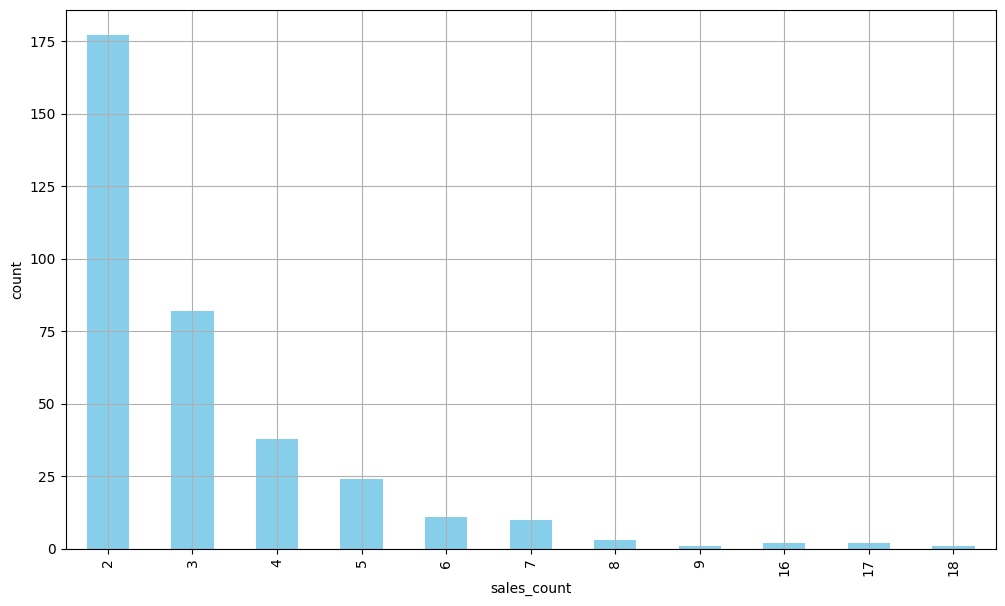

In [61]:
# We filter on invoicedate_purchase_duration greater than 0
summary_dfy3 = summary_dfy2.loc[summary_dfy2['invoicedate_purchase_duration'] >= 0]

ax = summary_dfy3.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

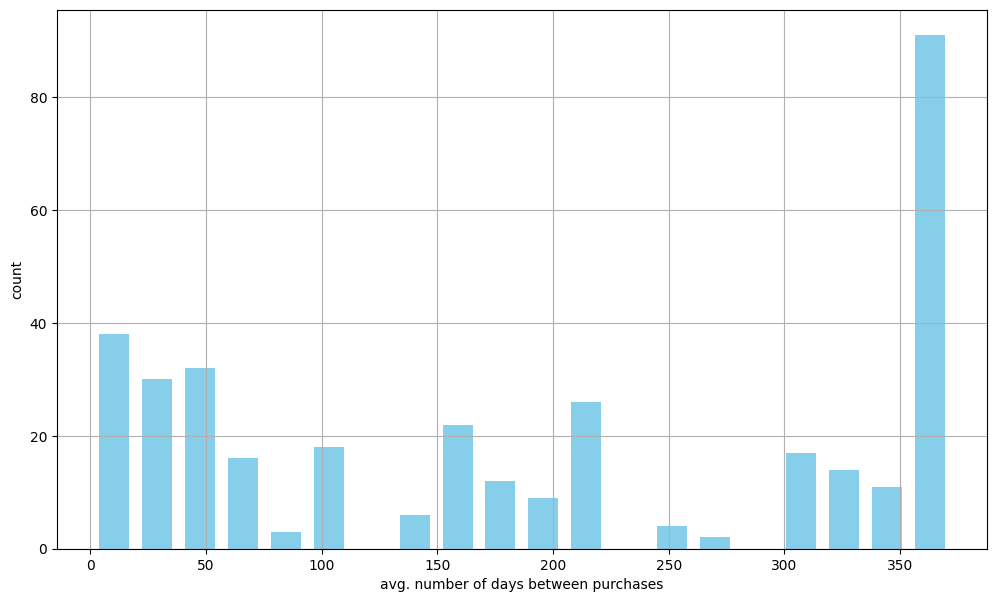

In [62]:
# Now we create a distribution for the average times between sales
ax = summary_dfy3['invoicedate_purchase_duration'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

##Forecasting 4 month Customer Lifetime Value

In [63]:
orders_dfy.head()

Sales         InvoiceDate
CustomerID InvoiceNo                               
12347.0    537626      426855.0 2020-12-07 14:57:00
           542237      214500.0 2021-01-26 14:30:00
           581180     3214926.0 2021-12-07 15:52:00
12348.0    539318      720720.0 2020-12-16 19:09:00
12350.0    543037      214500.0 2021-02-02 16:01:00

In [64]:
# Create summary statistics in 4 month intervals for customer Sales

# Use 4M for 4 month
clv_freq = '4M'

# Groupby customer ID now, and group all invoices for 4 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_dfy.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12347.0,2020-12-31,426855.0,426855.0,1
1,12347.0,2021-04-30,214500.0,214500.0,1
2,12347.0,2021-12-31,3214926.0,3214926.0,1
3,12348.0,2020-12-31,720720.0,720720.0,1
4,12350.0,2021-04-30,214500.0,214500.0,1


In [65]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12347.0,2020-12-31,426855.0,426855.0,1,M_4
1,12347.0,2021-04-30,214500.0,214500.0,1,M_3
2,12347.0,2021-12-31,3214926.0,3214926.0,1,M_1
3,12348.0,2020-12-31,720720.0,720720.0,1,M_4
4,12350.0,2021-04-30,214500.0,214500.0,1,M_3


In [66]:
data_df['M'].unique()

array(['M_4', 'M_3', 'M_1', 'M_2'], dtype=object)

In [67]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4
CustomerID,,,,,,,,,
12347.0,NaN,214500.0,426855.0,NaN,1.0,1.0,NaN,214500.0,426855.0
12348.0,NaN,NaN,720720.0,NaN,NaN,1.0,NaN,NaN,720720.0
12350.0,NaN,214500.0,NaN,NaN,1.0,NaN,NaN,214500.0,NaN
12352.0,NaN,286000.0,NaN,NaN,2.0,NaN,NaN,572000.0,NaN
12356.0,NaN,1475760.0,NaN,NaN,1.0,NaN,NaN,1475760.0,NaN


In [68]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_4M
2,12347.0,3214926.0
8,12358.0,9769760.0
11,12362.0,7565272.0
14,12375.0,-29744.0
28,12417.0,5287139.0


In [69]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,CustomerID,CLV_4M
2.0,0.0,214500.0,426855.0,0.0,1.0,1.0,0.0,214500.0,426855.0,12347.0,3214926.0
NaN,0.0,0.0,720720.0,0.0,0.0,1.0,0.0,0.0,720720.0,12348.0,0.0
NaN,0.0,214500.0,0.0,0.0,1.0,0.0,0.0,214500.0,0.0,12350.0,0.0
NaN,0.0,286000.0,0.0,0.0,2.0,0.0,0.0,572000.0,0.0,12352.0,0.0
NaN,0.0,1475760.0,0.0,0.0,1.0,0.0,0.0,1475760.0,0.0,12356.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,2451735.0,0.0,0.0,1.0,0.0,0.0,2451735.0,0.0,0.0,18236.0,0.0
NaN,0.0,-486200.0,0.0,0.0,1.0,0.0,0.0,-486200.0,0.0,18245.0,0.0
NaN,0.0,0.0,1458600.0,0.0,0.0,1.0,0.0,0.0,1458600.0,18259.0,0.0
NaN,0.0,180180.0,0.0,0.0,1.0,0.0,0.0,180180.0,0.0,18260.0,0.0


In [70]:
sample_set_df.shape

(1048, 11)